<h2> LDA - static stopping - expanding

In [11]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, RandomizedSearchCV
from mne.decoding import CSP
from sklearn.pipeline import Pipeline

current_directory = os.path.abspath('')

project_root = os.path.abspath(os.path.join(current_directory, '..', '..', '..', '..'))

sys.path.append(project_root)

print("ROOT:", project_root)
from Early_predict_UQ.data.make_dataset import make_data

def run_expanding_classification(subjects, initial_window_length, expansion_rate, parameters):
    scores_across_subjects = []
    current_person = 0
    subjects_accuracies = []

    for person in subjects:
        current_person += 1
        print("Person %d" % (person))
        subject= [person]
        epochs, labels = make_data(subject)
        epochs_train = epochs.copy()
        labels = epochs.events[:, -1] - 4
        epochs_data = epochs.get_data(copy=False)
        epochs_data_train = epochs_train.get_data(copy=False)
        
        csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
        lda = LinearDiscriminantAnalysis()
        
        pipeline = Pipeline([
            ('csp', csp),
            ('lda', lda)
        ])
        
        cv = ShuffleSplit(2, test_size=0.2, random_state=42)
        param_search = RandomizedSearchCV(pipeline, parameters, cv=cv, n_iter=10, n_jobs=-1, verbose=1)

        param_search.fit(epochs_data_train, labels)
        best_params = param_search.best_params_
        print("Best parameters:", best_params)

        scores_across_subjects.append(param_search.best_score_)

    accuracy = np.mean(scores_across_subjects)

    return scores_across_subjects, accuracy, epochs, labels

if __name__ == "__main__":
    subjects = [1,2,3,4,5,6,7,8,9]  # 9 subjects
    sfreq = 250      
    initial_window_length = int(sfreq * 0.5)  
    expansion_rate = int(sfreq * 0.1)   
    parameters = {
                    'csp__n_components': [2, 4, 6, 8, 10], 
                    'csp__transform_into': ['average_power', 'csp_space'],
                    'lda__shrinkage': [None, 'auto', 0.5],
                    'lda__solver': ['lsqr', 'eigen'],
                    'lda__store_covariance': [True, False]
                  }

    accuracy, epochs, labels = run_expanding_classification(subjects, initial_window_length, expansion_rate, parameters)

    accuracy_array = np.array(accuracy)
    print("accuracy_array: ", accuracy)


Choosing from all possible events


ROOT: /workspaces/UQ_Early_prediction_MI_BCI
Person 1
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/sklearn/pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/sklearn/pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/sklearn/pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/mne/decoding/csp.py", line 252, in fit_transform
    return super().fit_transform(X, y=y, **fit_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/mne/decoding/mixin.py", line 33, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/mne/decoding/csp.py", line 190, in fit
    covs, sample_weights = self._compute_covariance_matrices(X, y)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/mne/decoding/csp.py", line 527, in _compute_covariance_matrices
    cov, weight = cov_estimator(X[y == this_class])
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/mne/decoding/csp.py", line 543, in _concat_cov
    cov = _regularized_covariance(
          ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/mne/cov.py", line 2112, in _regularized_covariance
    cov = _compute_covariance_auto(
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/mne/cov.py", line 1252, in _compute_covariance_auto
    RawArray(data.T, info, copy=None, verbose=_verbose_safe_false()),
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<decorator-gen-248>", line 10, in __init__
  File "/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/mne/io/array/array.py", line 80, in __init__
    raise ValueError(
ValueError: data copying was not requested by copy=None but it was required to get to double floating point precision


Subject 3: Accuracy 0.6287116858237548
Subject 7: Accuracy 0.6260775862068964
Subject 1: Accuracy 0.6215277777777778
Subject 8: Accuracy 0.5512452107279694
Subject 9: Accuracy 0.5140086206896552
Subject 2: Accuracy 0.4803639846743295
Subject 4: Accuracy 0.4407327586206896
Subject 6: Accuracy 0.37164750957854414
Subject 5: Accuracy 0.3551245210727969


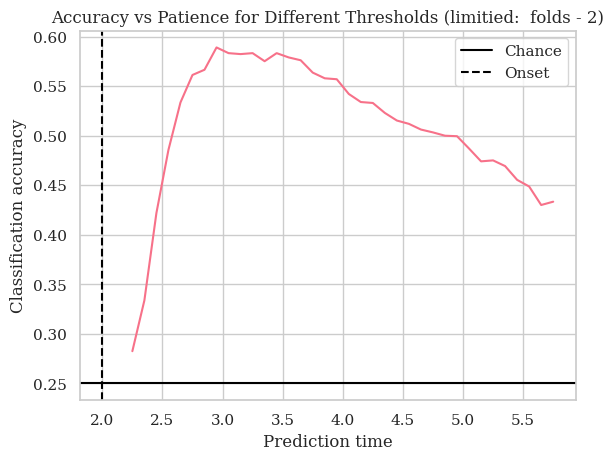

In [ ]:

subject_tuples = [(i+1, acc) for i, acc in enumerate(subjects_accuracies)]

sorted_subjects = sorted(subject_tuples, key=lambda x: x[1], reverse=True)

for subject, accuracy in sorted_subjects:
    print(f"Subject {subject}: Accuracy {accuracy}")

class_balance = np.zeros(4)
for i in range(4):
    class_balance[i] = np.mean(labels == i)
class_balance = np.max(class_balance)

plt.title("Accuracy over time")
plt.xlabel("Prediction time")
plt.ylabel("Classification accuracy")

prediction_times = np.arange(0, epochs_data.shape[2] - initial_window_length, expansion_rate)
prediction_times  = (prediction_times + (initial_window_length / epochs.tmin)) / sfreq + epochs.tmin

plt.plot(prediction_times, accuracy_array)
plt.axhline(class_balance, linestyle="-", color="k", label="Chance")
plt.axvline(epochs.tmin, linestyle="--", color="k", label="Onset")
plt.title('Accuracy vs Patience for Different Thresholds (limitied:  folds - 2)')
plt.legend()
plt.grid(True)
plt.show()